In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
X = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
y = pd.DataFrame(load_iris().target, columns=['Category'])
X
y.iloc[:5,:]

,Category
0,0
1,0
2,0
3,0
4,0


In [5]:
x_scalar = StandardScaler().fit_transform(X)
x_scalar[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

<Axes: >

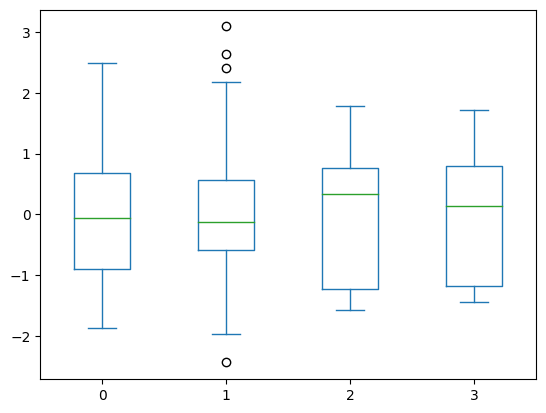

In [9]:
pd.DataFrame(x_scalar).plot(kind='box')

In [14]:
acc = []
for i in range(X.shape[1]):
    temp = []
    for j in range(X.shape[1]):
        if i != j:
            temp.append(j)
    x_scalar = StandardScaler().fit_transform(X[X.columns[[temp[0], temp[1], temp[2]]]])
    x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, random_state=42, test_size=0.3)
    model = GaussianNB().fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
acc

[1, 2, 3]
[0, 2, 3]
[0, 1, 3]
[0, 1, 2]


c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.9777777777777777, 1.0, 0.9333333333333333, 0.8888888888888888]

<Axes: >

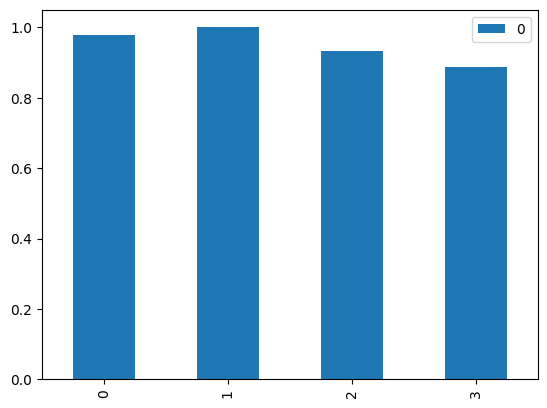

In [16]:
pd.DataFrame(acc).plot(kind='bar')